# LAB06 - LE COUEDIC - PRUVOT DE NEUFVILLE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as sp
from IPython.display import display, Markdown, Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.patches as mpatches
import sklearn
import math 
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro 

## A - Stationarity analysis

### 1.

In [3]:
df = pd.read_csv('USeconomics.csv', sep=',', header=0, index_col=['ID'])
df.head()

,log.M1.,log.GNP.,rs,rl
ID,,,,
1,6.111246,7.249073,0.010800,0.026133
2,6.115892,7.245084,0.008133,0.025233
3,6.129268,7.257003,0.008700,0.024900
4,6.141177,7.271565,0.010367,0.025667
5,6.151881,7.292746,0.012600,0.027467


### 2.

In [4]:
logGNP = df['log.GNP.']
logGNP.head()

ID
1    7.249073
2    7.245084
3    7.257003
4    7.271565
5    7.292746
Name: log.GNP., dtype: float64

In [5]:
trimestres = np.linspace(1954, 1987.75, 136)
#136 correspond au résulat de (1987,75-1954)*4+1. 
trimestres

array([1954.  , 1954.25, 1954.5 , 1954.75, 1955.  , 1955.25, 1955.5 ,
       1955.75, 1956.  , 1956.25, 1956.5 , 1956.75, 1957.  , 1957.25,
       1957.5 , 1957.75, 1958.  , 1958.25, 1958.5 , 1958.75, 1959.  ,
       1959.25, 1959.5 , 1959.75, 1960.  , 1960.25, 1960.5 , 1960.75,
       1961.  , 1961.25, 1961.5 , 1961.75, 1962.  , 1962.25, 1962.5 ,
       1962.75, 1963.  , 1963.25, 1963.5 , 1963.75, 1964.  , 1964.25,
       1964.5 , 1964.75, 1965.  , 1965.25, 1965.5 , 1965.75, 1966.  ,
       1966.25, 1966.5 , 1966.75, 1967.  , 1967.25, 1967.5 , 1967.75,
       1968.  , 1968.25, 1968.5 , 1968.75, 1969.  , 1969.25, 1969.5 ,
       1969.75, 1970.  , 1970.25, 1970.5 , 1970.75, 1971.  , 1971.25,
       1971.5 , 1971.75, 1972.  , 1972.25, 1972.5 , 1972.75, 1973.  ,
       1973.25, 1973.5 , 1973.75, 1974.  , 1974.25, 1974.5 , 1974.75,
       1975.  , 1975.25, 1975.5 , 1975.75, 1976.  , 1976.25, 1976.5 ,
       1976.75, 1977.  , 1977.25, 1977.5 , 1977.75, 1978.  , 1978.25,
       1978.5 , 1978

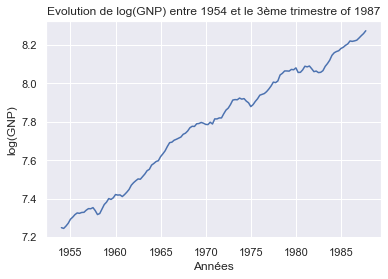

In [6]:
plt.plot(trimestres, logGNP)
plt.xlabel("Années")
plt.ylabel("log(GNP)")
plt.title("Evolution de log(GNP) entre 1954 et le 3ème trimestre of 1987")
plt.show();

### 3.

Par définition, une série temporelle est dite stationaire si sa moyenne, sa variance, et sa covariance sont constantes au cours du temps. A l'aide du graphique ci-dessus, on remarque que la fonction est croissante. Ainsi, la série temporelle n'est pas stationnaire.

### 4.

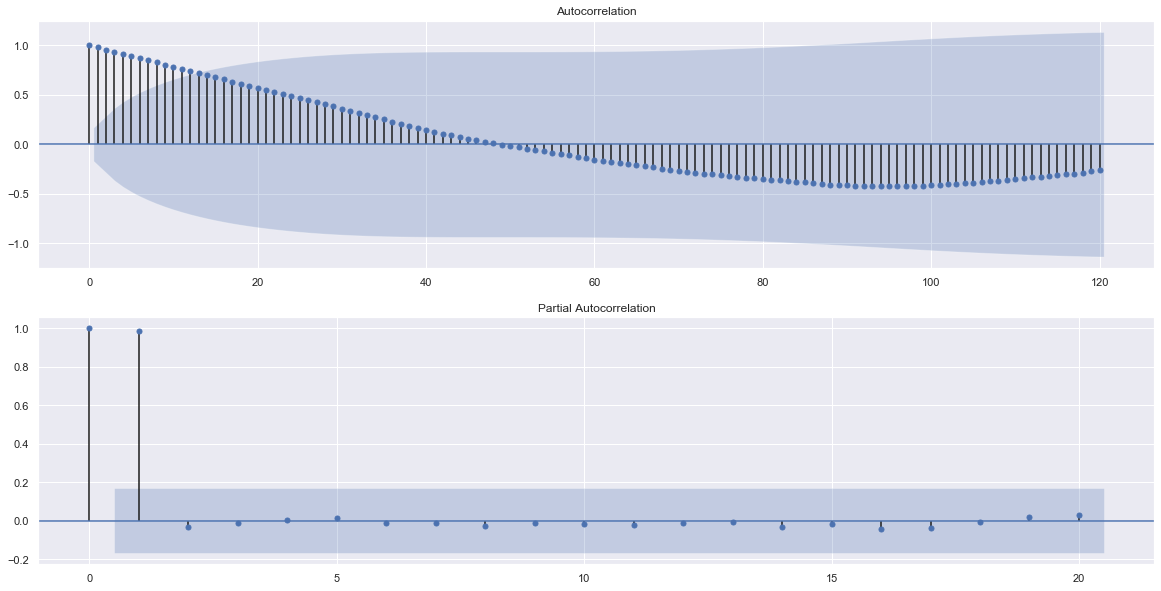

In [7]:
plt.figure(figsize =(20 ,10) )
plt.subplot( 2, 1, 1 )
plot_acf(logGNP , ax=plt.gca(), lags=120 )
plt.subplot( 2, 1, 2 )
plot_pacf( logGNP , ax=plt.gca() , lags = 20)
plt.show();

Sur le graphique de l'ACF, on peut constater une forte auto-corrélation entre tous les décalages (un peu moins entre 40 et 60). Cette caractéristique est souvent une preuve que la série n'est pas stationnaire.
Sur le graphique de la PACF, on peut remarquer que la corrélation partielle du décalage d'indice 1 est très élevée (quasiment égale à 1). Enfin, pour les autres décalages, la corrélation partielle est quasiement nulle.

Note : L'auto-corrélation du décalage 0 vaut toujours 1 car cela représente l'auto-corrélation de la série avec elle même.


### 5.

In [8]:
acorr_ljungbox(logGNP, lags=1, boxpierce=True)

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([132.86571499]),
 array([9.67388306e-31]),
 array([129.97732988]),
 array([4.14484535e-30]))

En utilisant la foncion accor_ljungbox, on peut remarquer que la p-value d'ordre 0 est de l'ordre de 10^-30. On peut ainsi être quasiment sûr de pouvoir refuser l'hypothèse H0 : "il n'y a pas d'auto-corrélation entre les erreurs".

### 6.

On peut donc en conclure que la série étudiée dans cette partie n'est pas stationnaire.

# B - Study of diffGNP 

### 1.

In [9]:
DiffGNP = []

for t in range(2, len(logGNP)+1):
    DiffGNP.append(logGNP[t] - logGNP[t-1])
        
DiffGNP

[-0.003988609276500021,
 0.011918415768739976,
 0.014562004729399725,
 0.021180822079450046,
 0.010895786742389113,
 0.013239027278481252,
 0.008729636814429398,
 -0.0019773272986087775,
 0.004542021434500221,
 0.0007221876031975327,
 0.011030363443561342,
 0.008209749074990391,
 -0.0005795794991101388,
 0.005844777228379172,
 -0.015619266804579368,
 -0.02050410270075087,
 0.005363718451410371,
 0.023367684244079534,
 0.023401456826750433,
 0.012339262757370406,
 0.018869647873719586,
 -0.004592079093509227,
 0.008494047219469003,
 0.01701398507667129,
 -0.0028756310254616224,
 0.0009594627744915485,
 -0.008608029074610002,
 0.010344712446698878,
 0.012368594379700504,
 0.014200449868010168,
 0.022241064276969702,
 0.013021017302970783,
 0.010351769691049562,
 0.009253425218179068,
 -0.001655995079249628,
 0.013444381723049403,
 0.01375001363169126,
 0.017322218604349793,
 0.007160563423429522,
 0.02210321383506031,
 0.008533303358240651,
 0.010023877784958835,
 0.004272544135490719,
 

Les valeurs de cette nouvelle série représentent la différence du logGNP entre deux trimestres consécutifs. 

### 2.

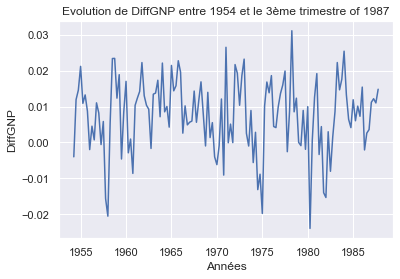

In [10]:
plt.plot(trimestres[1:], DiffGNP) #on enlève le premier trimestre pour que x et y est la même taille
plt.xlabel("Années")
plt.ylabel("DiffGNP")
plt.title("Evolution de DiffGNP entre 1954 et le 3ème trimestre of 1987")
plt.show();

Graphiquement et à première vue, cette série semble stationnaire.

### 3.

In [11]:
moyenne = np.mean(DiffGNP)
moyenne

ttest_ind(DiffGNP,np.zeros(135))

0.007596585523034961

Ttest_indResult(statistic=8.673887906521033, pvalue=4.093207134204438e-16)

En calculant la moyenne empirique de cette série, on obtient environ 0.008. 
On obtient à l'aide de ttest_ind que la p-value vaut environ 4e-16, ce qui est très largement inférieur à 0.05. On peut donc quasiement être sûr de pouvoir rejeter l'hypothèse 𝐻0  : "Les deux populations ont la même moyenne". 
Ainsi, cette série n'est pas centrée autour de 0.

### 4.

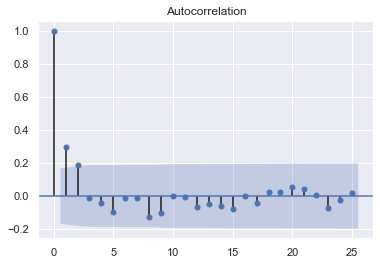

In [12]:
plot_acf(DiffGNP,lags = 25);

Ce graphique devrait nous permettre de déterminer la valeur de q pour le modèle Moving Average.
Graphiquement, pour trouver cette valeur, on cherche l'indice du dernier pic qui n'est pas dans l'intervalle de confiance, c'est-à-dire dans la zone gris foncéé. Ici il difficile de savoir: il peut s'agit de 1 ou 2. Nous prendrons donc en considération ces deux valeurs.

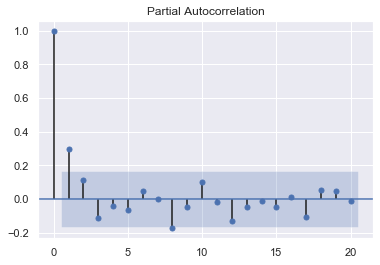

In [13]:
plot_pacf(DiffGNP,lags=20);

Ce graphique devrait lui nous permettre de déterminer la valeur de p pour le modèle Auto-Regressive. Pour trouver ces valeurs graphiquement, on procède de la même façon. Encore une fois, il est difficile de trancher : il peut s'agir de 0,1 ou 8.


On a donc les valeurs possibles suivantes :
- q : 1 ou 2
- p : 0, 1 ou 8

### 5.

In [14]:
df_diffGNP = pd.DataFrame({'diffGNP': []})

# On a trouvé la fonction floatToDate sur https://stackoverflow.com/. En effet nous avions besoin d'effectuer cette transformation 
#car sinon nous avions cette erreur "ValueError: Insufficient degrees of freedom to estimate".

def floatToDate(date_as_float):
    year = int(date_as_float)
    months_offset = round((date_as_float - float(year)) * 12.0, 0)
    new_date = datetime.datetime(year,1,1,0,0,0,0)
    new_date = new_date + relativedelta(months=int(months_offset))
    return new_date

for t in range(2, len(logGNP) + 1):
    df_diffGNP.loc[floatToDate(trimestres[t-1])] = logGNP[t] - logGNP[t-1]
        

train_set = df_diffGNP[0: int(70/100 * df_diffGNP.size)]
test_set = df_diffGNP[int(70/100 * df_diffGNP.size):]

def ARMA_model(p, q, show=True):
    model = sm.tsa.ARMA(train_set, (p,q)).fit();
    pred = model.predict(test_set.index[0], test_set.index[test_set.size - 1], dynamic=False)
    if(show==True):
        df.plot();
        pred.plot();
        plt.title("ARMA (%s,%s)" % (p, q))
        plt.show();
        error = mean_squared_error(test['diffGNP'], pred)
        print("Mean squared error %s" % (error))
        print(model.summary())
    return model

ARMA_model(0,1)
ARMA_model(0,2)
ARMA_model(1,1);
ARMA_model(1,2);
ARMA_model(8,1);
ARMA_model(8,2);

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ValueError: view limit minimum -36281.200000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36281.200000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

A  noter qu'ici `ar.X` et `ma.X` représentent les différents coefficients des modèles `AR` et `MA`.

Pour commencer l'AIC ou Akaike Inforation Criterion, est un critère de qualité qui prend en compte la vraisemblance du modèle mais qui pénalise le nombre de paramètres pris en compte dans celui-ci. Sa formule est $AIC = 2k - 2ln(L)$ avec k le nombre de paramètres et L le maximum de la fonction de vraisemblance du modèle. Ainsi plus l'AIC du modèle est faible et plus ce dernier est bon.

Ensuite, le BIC ou Bayesian Information Criterion, est un critère de qualité qui prend en compte le nombre d'observations dans l'échantillon étudié, la vraisemblance du modèle ainsi que le nombre de paramètres du modèle. Sa formule est $BIC = -2ln(L) + ln(n)*k$. Encore une fois, plus le BIC du modèle est faible et plus ce dernier est bon.

La vraisemblance représente la plausibilité d'une valeur d'un paramètre permettant de rendre le plus probable les observations des expériences déjà observées. On cherche à maximiser pour chaque paramètre sa fonction de vraisemblance associée. On utilise le log de la vraisemblance par simplicité (plus simple de dériver une somme de log qu'un produit pour chercher le maximum).

L'erreur type de chaque modèle représente l'erreur moyenne pour chaque échantillon entre la valeur prédite et la valeur réelle.

### 6.

Au vue des résultats obtenus, le meilleur modèle semble être $ARMA(0,2)$.
Ce modèle a en effet : 
- Le plus faible AIC  : -603.887  
- Un des plus faibles BIC :  -593.713
- Un bon log de vraisemblance : 305.943 (pas le meilleur néanmoins mais un des meilleurs)
- Une erreur type de : 0.001
- Des p-values inférieures à 0.05 pour chaucun des paramètres

### 7.

Voir question 5 (orange: prédictions, bleu:vrais résultats). Les prédictions sont plutôt bonnes mais pas excellentes. L'erreur quadratique moyenne pour le meilleur modèle est 0.00011515352047305352

### 8.

- Pour ARMA(0,1)

In [ ]:
residus_mod1 = ARMA_model(0,1, False).resid
acorr_ljungbox(residus_mod1, 1, True)
shapiro(residus_mod1)
plot_acf(residus_mod1,lags=20);

Avec le test de Box-Pierce, on s'aperçoit qu'il est plutôt probable qu'il y ait une auto-corrélation entre les résidus : p-value = 0.63 donc on ne rejette pas H0.

Avec le test de Shapiro, on constate qu'il est éventullement possible que les résidus suivent une distribution normale : p-value = 0.09 donc on ne rejette pas H0.

- Pour ARMA(0,2)

In [ ]:
residus_mod2 = ARMA_model(0,2, False).resid
acorr_ljungbox(residus_mod2, 1, True)
shapiro(residus_mod2)
plot_acf(residus_mod2,lags=20);

Avec le test de Box-Pierce, on s'aperçoit qu'il est très probable qu'il y ait une auto-corrélation entre les résidus : p-value = 0.94 donc on ne rejette pas H0.

Avec le test de Shapiro, on remaeque qu'il est très probable que les résidus suivent une distribution normale : p-value = 0.32 donc on ne rejette pas H0.

- Pour ARMA(8,2)

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([0.00308038]),
 array([0.95573916]),
 array([0.00298412]),
 array([0.95643553]))

(0.9762089848518372, 0.08399645984172821)

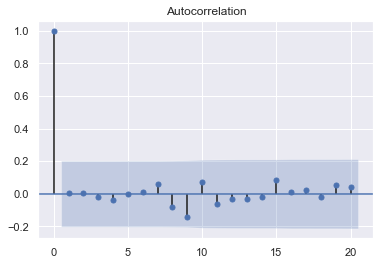

ValueError: view limit minimum -36095.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [19]:
residus_mod3 = ARMA_model(8,2, False).resid
acorr_ljungbox(residus_mod3, 1, True)
shapiro(residus_mod3)
plot_acf(residus_mod3);
plt.plot(residus_mod3)

Avec le test de Box-Pierce, on s'aperçoit qu'il est très probable qu'il y ait une auto-corrélation entre les résidus : p-value = 0.96 donc on ne rejette pas H0.

Avec le test de Shapiro, on remarque qu'il est possible que les résidus suivent une distribution normale : p-value = 0.08 donc on ne rejette pas H0.

Ainsi le modèle (0,2) semble être le plus approprié.

# C - ARIMA model 

In [16]:
df_diff2GNP = pd.DataFrame({'diffGNP': []})      
df_diff2GNP = df_diffGNP.diff()
df_diff2GNP = df_diff2GNP.dropna()
df_diff2GNP.head()

,diffGNP
1954-07-01,0.015907
1954-10-01,0.002644
1955-01-01,0.006619
1955-04-01,-0.010285
1955-07-01,0.002343


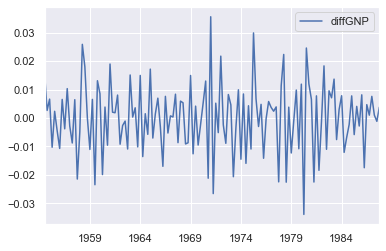

In [17]:
df_diff2GNP.plot()

Graphiquement, la série semble être stationnaire.

In [1]:
moyenne = df_diff2GNP['diff2GNP'].mean()
moyenne
ttest_ind(df_diff2GNP['diff2GNP'],np.zeros(133))

NameError: name 'df_diff2GNP' is not defined

La moyenne empirique de la série est d'environ 0.0001. La p-value est d'environ 0.89, ce qui est nettement supérieur à 0.05. On  ne peut donc pas rejeter l'hypothèse nulle  𝐻0  : "Les deux populations ont la même moyenne". On en conclut donc que cette série est centrée autour de 0.

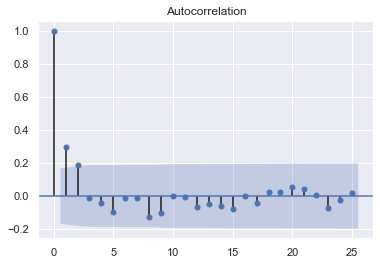

In [32]:
plot_acf(df_diff2GNP['diff2GNP'],lags = 25);

Ce graphique à savoir l'auto-corrélogramme devrait nous permettre de déterminer la valeur de q pour le modèle Moving Average.
Graphiquement, on procède de la même manière que dans la partie B. On remarque qu'il y a uniquement l'indice 1 et qu'il n'y a pas d'ambigüité.

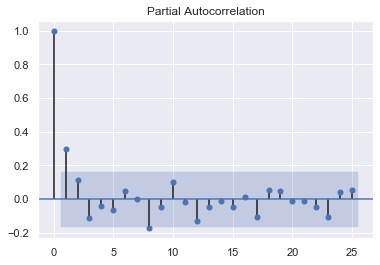

In [35]:
plot_pacf(df_diff2GNP['diff2GNP'],lags = 25);

Ce graphique, à savoir celui de l'auto-corrélation partielle devrait nous permettre de déterminer la valeur de p pour le modèle Auto-regressive. Il est difficile de trancher. Il peut ici s'agir de 0, 1 ou 8.

On a donc les valeurs possibles suivantes :
- q : 1 
- p : 0, 1, 8 

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


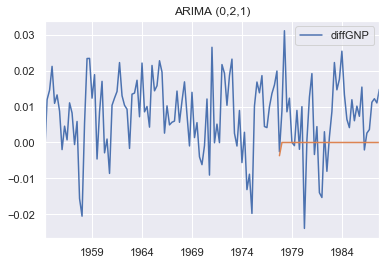

Mean squared error 0.0001598279694088644
                             ARIMA Model Results                              
Dep. Variable:            D2.diff2GNP   No. Observations:                   92
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 276.373
Method:                       css-mle   S.D. of innovations              0.012
Date:                Wed, 06 May 2020   AIC                           -546.745
Time:                        11:44:07   BIC                           -539.180
Sample:                    10-01-1954   HQIC                          -543.692
                         - 07-01-1977                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.659e-07   4.52e-05     -0.004      0.997   -8.88e-05    8.85e-05
ma.L1.D2.diff2GNP    -0.9999      0.027    -36.599      0.000      -1

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


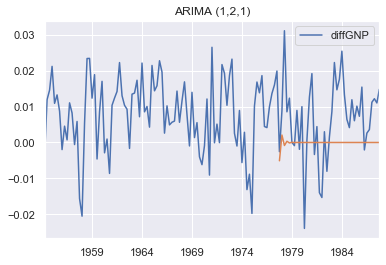

Mean squared error 0.00015890461023605255
                             ARIMA Model Results                              
Dep. Variable:            D2.diff2GNP   No. Observations:                   92
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 284.542
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 06 May 2020   AIC                           -561.084
Time:                        11:44:09   BIC                           -550.997
Sample:                    10-01-1954   HQIC                          -557.013
                         - 07-01-1977                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.303e-06   2.96e-05      0.078      0.938   -5.56e-05    6.02e-05
ar.L1.D2.diff2GNP    -0.4065      0.095     -4.258      0.000      -

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


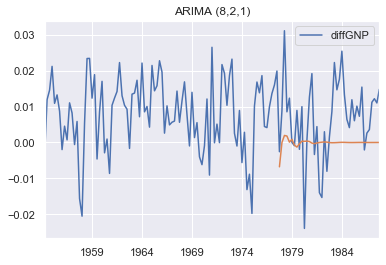

Mean squared error 0.0001576876874121797
                             ARIMA Model Results                              
Dep. Variable:            D2.diff2GNP   No. Observations:                   92
Model:                 ARIMA(8, 2, 1)   Log Likelihood                 291.229
Method:                       css-mle   S.D. of innovations              0.010
Date:                Wed, 06 May 2020   AIC                           -560.457
Time:                        11:44:26   BIC                           -532.717
Sample:                    10-01-1954   HQIC                          -549.261
                         - 07-01-1977                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.509e-06   1.42e-05      0.318      0.750   -2.33e-05    3.23e-05
ar.L1.D2.diff2GNP    -0.5649      0.106     -5.335      0.000      -0

In [40]:
df_diff2GNP = pd.DataFrame({'diff2GNP': []})

def floatToDate(date_as_float):
    year = int(date_as_float)
    months_offset = round((date_as_float - float(year)) * 12.0, 0)
    new_date = datetime.datetime(year,1,1,0,0,0,0)
    new_date = new_date + relativedelta(months=int(months_offset))
    return new_date

for t in range(2, len(logGNP) + 1):
    df_diff2GNP.loc[floatToDate(trimestres[t-1])] = logGNP[t] - logGNP[t-1]
        

train_set2 = df_diff2GNP[0: int(70/100 * df_diff2GNP.size)]
test_set2 = df_diff2GNP[int(70/100 * df_diff2GNP.size):]

def ARIMA_model(p,q, show=True):
    model = sm.tsa.ARIMA(train_set2, (p,2,q)).fit();
    pred = model.predict(test_set2.index[0], test_set2.index[test_set2.size - 1], dynamic=False)
    if(show==True):
        df.plot();
        pred.plot();
        plt.title("ARIMA (%s,2,%s)" % (p, q))
        plt.show();
        error = mean_squared_error(test['diffGNP'], pred)
        print("Mean squared error %s" % (error))
        print(model.summary())
    return model

ARIMA_model(0,1);
ARIMA_model(1,1);
ARIMA_model(8,1);

Cette analyse sur les modèles ARIMA des différents couples de valeurs (p,q) vient nous montrer que le couple (1,1) semble être le plus optimal. En effet, on obtient pour le modèle ARIMA (1,2,1) les valeurs de AIC et BIC suivantes : -561,084 et -550,997, un log de vraisemblance de 284,542 et un ecart type de l'ordre de 10^-5. Ces valeurs sont meilleurs parmis les trois modèles. Effectuons les tests fait dans la partie B sur ce modèle.

C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\TLC10\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


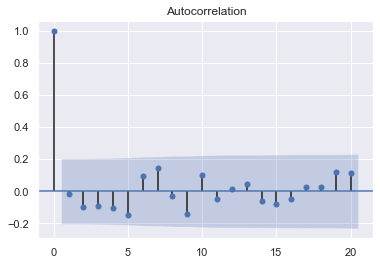

In [41]:
residus = ARIMA_model(1,1, False).resid
acorr_ljungbox(residus, 1, True)
shapiro(residus)
plot_acf(residus,lags=20);

Avec le test de Box-Pierce, on s'aperçoit qu'il est très probable qu'il y ait une auto-corrélation entre les résidus : p-value = 0.80 donc on ne rejette pas H0.

Avec le test de Shapiro, on s'aperçoit qu'il est probable que les résidus suivent une distribution normale :  p-value = 0.41 donc on ne rejette pas H0.